### KNN on SVHN

#### Import the data from drive

In [0]:
import warnings 
warnings.filterwarnings('ignore')
#import numpy as np
#np.seterr(over='ignore')
import os
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [0]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


### Visualizing the first 10 images in the dataset and their labels

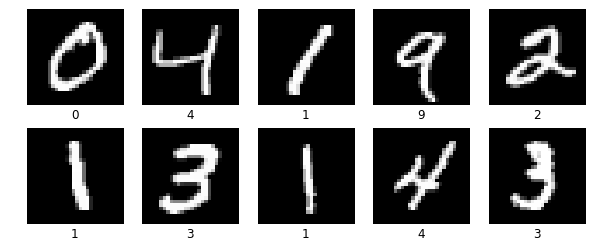

In [0]:
fig = plt.figure(figsize=(10, 4))

for i in range(1, 11):
  img = x_train[i].reshape(28,28)
  fig.add_subplot(2, 5, i)
  plt.axis('off')
  plt.title(y_train[i], y=-0.2)
  plt.imshow(img, cmap='gray')

plt.show()

### Build KNN and predict the outputs for any 2 images from the test data.

In [0]:
class NN:
  
  def __init__(self):
    pass
  
  def train(self, x, y):
    self.train_samples = x
    self.train_labels = y
  
  def predict(self, x):
    
    dist = []
    
    for i,sample in enumerate(self.train_samples):
      dist.append((np.linalg.norm(x - sample), self.train_labels[i]))
      
    dist.sort()
    #dist = np.array(dist, dtype=int)

    return dist[0][1]

In [0]:
model = NN()

In [0]:
model.train(x_train, y_train)

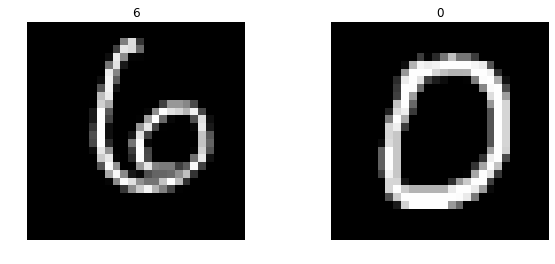

In [0]:
samples = [x_test[100], x_test[10]]

fig = plt.figure(figsize=(10, 4))

for i, sample in enumerate(samples):
  fig.add_subplot(1,2,i+1)
  plt.axis('off')
  plt.title(model.predict(sample))
  plt.imshow(sample.reshape(28,28), cmap='gray')

plt.show()

##Accuracy for Validation Set

In [0]:
# test accuracy
from tqdm import tqdm_notebook as tqdm
prediction = []
for sample in tqdm(x_test):
  prediction.append(model.predict(sample))

print(f'The test accuracy is {round(len(y_test[y_test == prediction])/len(y_test) * 100. ,2)}')


The test accuracy is 48.41
